# Web Scraping Job Vacancies Part 2


At the moment, I am extending the dataset from my previous web scraping project. In this phase, I intend to include major cities in Indonesia to observe the current trends and combine them into a single dataset. I generated a list of large cities programmatically to see the results. Most of the code used below is based on my earlier project, with the main addition being the inclusion of multiple cities to further analyze the effect.

## Step 1: Data Collection and Preparation


In [2]:
# Data handling and cleaning
import pandas as pd
import numpy as np

# Visualization libraries (commonly used for EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Web scraping essentials
import requests
from bs4 import BeautifulSoup

## Step 2:Exploratory Data Analysis

In [87]:
file_path = 'https://raw.githubusercontent.com/Jasman123/Web_scraping_and_Job_Analyze/main/jobstreet_jobs_with_cities.csv'
df = pd.read_csv(file_path)
df.head()

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency
0,"Customer Service (Jakarta), Operations, SeaBank",(Call Center & Layanan Konsumen),PT Bank Seabank Indonesia,Jakarta Selatan,1 hari yang lalu,NaN,Carry out services to customers such as delive...,NaN,NaN,NaN,NaN
1,Young Professionals Fast Track,"(Manufaktur, Transportasi & Logistik)",Deliveree (PT Angkut Teknologi Indonesia),Jakarta Selatan,1 hari yang lalu,"Rp 6,000,000 – Rp 9,000,000 per month","If you just click apply, you will not receive ...",6000000.0,9000000.0,month,IDR
2,Customer Service and Operation Specialist (Air...,"(Manufaktur, Transportasi & Logistik)",Easy Speed International Logistics Limited,Jakarta Selatan,3 hari yang lalu,"Rp 8,000,000 – Rp 12,000,000 per month",Airfreight customer service and import and exp...,8000000.0,12000000.0,month,IDR
3,Logistic,"(Manufaktur, Transportasi & Logistik)",NaN,Jakarta Raya,23 jam yang lalu,NaN,"Responsible of logistic from receipt, storage...",NaN,NaN,NaN,NaN
4,Customer Service Specialist,(Call Center & Layanan Konsumen),TE Connectivity,Jakarta Raya,16 jam yang lalu,NaN,"Involves demand planning, order management, cu...",NaN,NaN,NaN,NaN


In [88]:
df = df.drop_duplicates()

In [89]:
df = df[df['Unit']=='month']

In [90]:
df['Average_salary'] = (df['Salary_High'] + df['Salary_Low']) / 2

## Step 3: Machine Learning Implementation on Predicting Job Salary

In [91]:
df.head()

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency,Average_salary
1,Young Professionals Fast Track,"(Manufaktur, Transportasi & Logistik)",Deliveree (PT Angkut Teknologi Indonesia),Jakarta Selatan,1 hari yang lalu,"Rp 6,000,000 – Rp 9,000,000 per month","If you just click apply, you will not receive ...",6000000.0,9000000.0,month,IDR,7500000.0
2,Customer Service and Operation Specialist (Air...,"(Manufaktur, Transportasi & Logistik)",Easy Speed International Logistics Limited,Jakarta Selatan,3 hari yang lalu,"Rp 8,000,000 – Rp 12,000,000 per month",Airfreight customer service and import and exp...,8000000.0,12000000.0,month,IDR,10000000.0
5,Sales Admin,(Administrasi & Dukungan Perkantoran),PT AAF International Indonesia,Jakarta Utara,10 hari yang lalu,"Rp 5,000,000 – Rp 7,000,000 per month",Sales Admin plays a crucial role in supporting...,5000000.0,7000000.0,month,IDR,6000000.0
6,Senior Videographer (Singapore),"(Periklanan, Seni & Media)",Boom Digital Media,Jakarta Raya,14 hari yang lalu,"$5,000 – $7,500 per month (SGD)",This job will be based in Singapore. The work ...,5000.0,7500.0,month,USD,6250.0
8,Customer Service - Assistant Manager,(Call Center & Layanan Konsumen),redBus,Jakarta Raya,1 hari yang lalu,"Rp 11,000,000 – Rp 14,000,000 per month",Hiring for CS Asst. Manager to lead vendor-man...,11000000.0,14000000.0,month,IDR,12500000.0


In [92]:
df.shape

(779, 12)

In [93]:
df['Classification'] = df['Classification'].str.replace(r"\((.*)\)", r" \1", regex=True)

In [94]:
df.head()

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency,Average_salary
1,Young Professionals Fast Track,"Manufaktur, Transportasi & Logistik",Deliveree (PT Angkut Teknologi Indonesia),Jakarta Selatan,1 hari yang lalu,"Rp 6,000,000 – Rp 9,000,000 per month","If you just click apply, you will not receive ...",6000000.0,9000000.0,month,IDR,7500000.0
2,Customer Service and Operation Specialist (Air...,"Manufaktur, Transportasi & Logistik",Easy Speed International Logistics Limited,Jakarta Selatan,3 hari yang lalu,"Rp 8,000,000 – Rp 12,000,000 per month",Airfreight customer service and import and exp...,8000000.0,12000000.0,month,IDR,10000000.0
5,Sales Admin,Administrasi & Dukungan Perkantoran,PT AAF International Indonesia,Jakarta Utara,10 hari yang lalu,"Rp 5,000,000 – Rp 7,000,000 per month",Sales Admin plays a crucial role in supporting...,5000000.0,7000000.0,month,IDR,6000000.0
6,Senior Videographer (Singapore),"Periklanan, Seni & Media",Boom Digital Media,Jakarta Raya,14 hari yang lalu,"$5,000 – $7,500 per month (SGD)",This job will be based in Singapore. The work ...,5000.0,7500.0,month,USD,6250.0
8,Customer Service - Assistant Manager,Call Center & Layanan Konsumen,redBus,Jakarta Raya,1 hari yang lalu,"Rp 11,000,000 – Rp 14,000,000 per month",Hiring for CS Asst. Manager to lead vendor-man...,11000000.0,14000000.0,month,IDR,12500000.0


I noticed that the dataset contains many variations of city names, such as Jakarta Utara, Jakarta Selatan, and so on, which actually all refer to the same location (Jakarta). To improve the quality of the data and avoid treating these as separate categories, it would be better to merge related city names into a single standardized form. For example, all Jakarta variants can be grouped into "Jakarta". The same approach should be applied to other cities as well.

In [95]:
string_cities = df['Location'].value_counts().to_string()
print(string_cities)

Location
Jakarta Raya           87
Jakarta Selatan        81
Jakarta Utara          56
Jakarta Pusat          48
Bali                   42
Jakarta Barat          39
Badung                 29
Manado                 25
Surabaya               21
Tangerang              17
Semarang               17
Bandung                15
Jakarta Timur          12
Karawang               12
Denpasar               12
Cikarang Pusat         11
Tangerang Selatan      11
Batam                  11
Makassar               10
Palembang              10
Pekanbaru              10
Cikarang Selatan       10
Cikarang                9
Pontianak               9
Bekasi                  8
Medan                   7
Kalimantan Barat        6
Kuta Utara              6
Sidoarjo                6
Jawa Timur              5
Ubud                    5
Denpasar Barat          5
Malang                  5
Padang                  5
Kabupaten Tangerang     5
Banjarmasin             4
Kabupaten Bekasi        4
Banten                  4
Kut

In [96]:
df.loc[df['Location'].str.contains("Jakarta", case=False), 'Location'] = "Jakarta"
df.loc[df['Location'].str.contains("Bekasi", case=False), 'Location'] = "Bekasi"
df.loc[df['Location'].str.contains("Cikarang", case=False), 'Location'] = "Cikarang"
df.loc[df['Location'].str.contains("Bandung", case=False), 'Location'] = "Bandung"
df.loc[df['Location'].str.contains("Bogor", case=False), 'Location'] = "Bogor"
df.loc[df['Location'].str.contains("Depok", case=False), 'Location'] = "Depok"
df.loc[df['Location'].str.contains("Badung", case=False), 'Location'] = "Bandung"
df.loc[df['Location'].str.contains("Tangerang", case=False), 'Location'] = "Tangerang"

In [97]:
string_cities = df['Location'].value_counts().to_string()
top20_cities = df['Location'].value_counts().nlargest(20).index.tolist()
print(top20_cities)

['Jakarta', 'Bandung', 'Bali', 'Tangerang', 'Cikarang', 'Manado', 'Surabaya', 'Semarang', 'Bekasi', 'Karawang', 'Denpasar', 'Batam', 'Pekanbaru', 'Makassar', 'Palembang', 'Pontianak', 'Medan', 'Kuta Utara', 'Kalimantan Barat', 'Sidoarjo']


In [98]:
df = df[df['Location'].isin(top20_cities)]
df.shape

(651, 12)

In [99]:
df.isnull().sum()

,0
Title,0
Classification,0
Company,35
Location,0
Posting,0
Salary,0
Description,0
Salary_Low,0
Salary_High,0
Unit,0


In [100]:
df = df.dropna()
df.shape

(615, 12)

### Focusing Data to IDR only

/tmp/ipython-input-3419061017.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Average_salary'], kde=True)


<Axes: xlabel='Average_salary', ylabel='Density'>

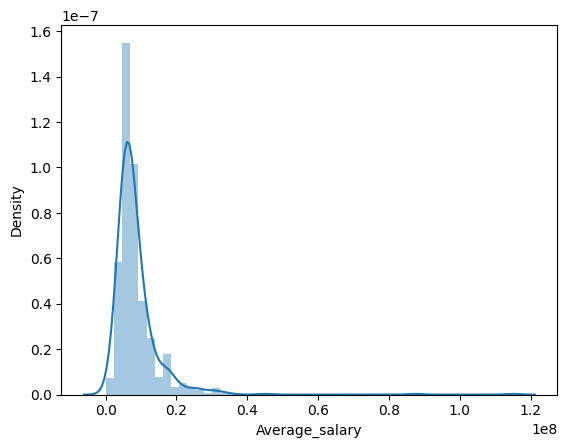

In [101]:
df = df[df['Currency']=='IDR']

sns.distplot(df['Average_salary'], kde=True)

/tmp/ipython-input-655939146.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Average_salary'], kde=True)


<Axes: xlabel='Average_salary', ylabel='Density'>

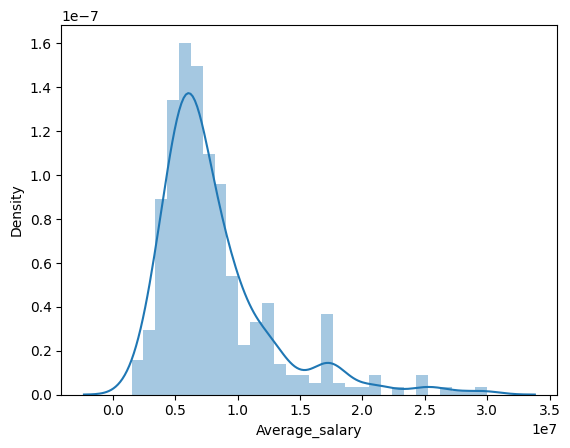

In [102]:
#Remove outlier value and take 99% data
q = df['Average_salary'].quantile(0.99)
df = df[df['Average_salary'] < q]

df = df[df['Average_salary'] > 100000]
sns.distplot(df['Average_salary'], kde=True)

In [103]:
#leveling salary into 4 levels for categorical classification
bins = [0, 5_000_000, 10_000_000, 20_000_000, 40_000_000]
labels = ["level_1", "level_2", "level_3", "level_4"]

df["Salary_level"] = pd.cut(df["Average_salary"], bins=bins, labels=labels)
df.head()

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency,Average_salary,Salary_level
1,Young Professionals Fast Track,"Manufaktur, Transportasi & Logistik",Deliveree (PT Angkut Teknologi Indonesia),Jakarta,1 hari yang lalu,"Rp 6,000,000 – Rp 9,000,000 per month","If you just click apply, you will not receive ...",6000000.0,9000000.0,month,IDR,7500000.0,level_2
2,Customer Service and Operation Specialist (Air...,"Manufaktur, Transportasi & Logistik",Easy Speed International Logistics Limited,Jakarta,3 hari yang lalu,"Rp 8,000,000 – Rp 12,000,000 per month",Airfreight customer service and import and exp...,8000000.0,12000000.0,month,IDR,10000000.0,level_2
5,Sales Admin,Administrasi & Dukungan Perkantoran,PT AAF International Indonesia,Jakarta,10 hari yang lalu,"Rp 5,000,000 – Rp 7,000,000 per month",Sales Admin plays a crucial role in supporting...,5000000.0,7000000.0,month,IDR,6000000.0,level_2
8,Customer Service - Assistant Manager,Call Center & Layanan Konsumen,redBus,Jakarta,1 hari yang lalu,"Rp 11,000,000 – Rp 14,000,000 per month",Hiring for CS Asst. Manager to lead vendor-man...,11000000.0,14000000.0,month,IDR,12500000.0,level_3
10,Visa & Document Staff,Administrasi & Dukungan Perkantoran,PT Traxist Kreatif Indonesia,Jakarta,19 jam yang lalu,Rp 5.000.000 – Rp 6.500.000 per month,"Competitive monthly salary, supportive and col...",5000000.0,6500000.0,month,IDR,5750000.0,level_2


In [158]:
#Unbalanced Data dispersion case
df['Salary_level'].value_counts()

,count
Salary_level,
level_2,339
level_1,140
level_3,107
level_4,18


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604 entries, 1 to 11693
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Title           604 non-null    object  
 1   Classification  604 non-null    object  
 2   Company         604 non-null    object  
 3   Location        604 non-null    object  
 4   Posting         604 non-null    object  
 5   Salary          604 non-null    object  
 6   Description     604 non-null    object  
 7   Salary_Low      604 non-null    float64 
 8   Salary_High     604 non-null    float64 
 9   Unit            604 non-null    object  
 10  Currency        604 non-null    object  
 11  Average_salary  604 non-null    float64 
 12  Salary_level    604 non-null    category
dtypes: category(1), float64(3), object(9)
memory usage: 62.1+ KB


In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # Extract words features
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import re
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

def custom_standardization(text):
    text = tf.strings.lower(text)
    text = tf.strings.regex_replace(text, r"http\S+", "")
    text = tf.strings.regex_replace(text, r"[^a-z\s]", "")
    text = tf.strings.regex_replace(text, r"\s+", " ")
    return text

# 1. Preparation data feature

#1.1 Combined text feature
df["Combined_text"] = (
    df["Title"].fillna('') + " " +
    df["Classification"].fillna('') + " " +
    df["Company"].fillna('') + " " +
    df["Location"].fillna('')
)

df["Combined_text"] = df["Combined_text"].apply(custom_standardization)

X = df["Combined_text"]

#1.2 Apply one-hot encoder to label data salary
le = LabelEncoder()
df["salary_encoded"] = le.fit_transform(df["Salary_level"])
y = df["salary_encoded"]

# print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(483,) (121,) (483,) (121,)


In [130]:
print(type(X_train))

<class 'pandas.core.series.Series'>


In [132]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train.astype(str).values, y_train))
train_ds = train_ds.shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((X_test.astype(str).values, y_test))
val_ds = val_ds.shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

In [139]:
MAX_VOCAB = 10000
SEQ_LENGTH = 200

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=MAX_VOCAB,
    output_mode='int',
    output_sequence_length=SEQ_LENGTH
)

vectorize_layer.adapt(train_ds.map(lambda text, label: text))

In [140]:
vectorize_layer.get_vocabulary()[:5]

['', '[UNK]', np.str_('pt'), np.str_('jakarta'), np.str_('indonesia')]

In [197]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight




model = Sequential([
    vectorize_layer,
    Embedding(input_dim=MAX_VOCAB, output_dim=64, mask_zero=True),
    LSTM(128),
    Dense(4, activation="softmax")  # 4-class classification
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,

)

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))

In [198]:
model.fit(train_ds,
          validation_data=val_ds,batch_size = 32,
          epochs=20,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 414ms/step - accuracy: 0.1782 - loss: 1.4751 - val_accuracy: 0.1570 - val_loss: 1.3791
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 319ms/step - accuracy: 0.5357 - loss: 1.3245 - val_accuracy: 0.5289 - val_loss: 1.2687
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 318ms/step - accuracy: 0.6624 - loss: 1.0773 - val_accuracy: 0.4793 - val_loss: 1.1499
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 417ms/step - accuracy: 0.7794 - loss: 0.6218 - val_accuracy: 0.3884 - val_loss: 1.3728
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 324ms/step - accuracy: 0.6767 - loss: 0.4698 - val_accuracy: 0.5620 - val_loss: 1.0388
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 409ms/step - accuracy: 0.8890 - loss: 0.2851 - val_accuracy: 0.4959 - val_loss: 1.2381
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 416ms/step - accuracy: 0.9059 - loss: 0.1979 - val_accuracy: 0.5124 - val_loss: 1.3876
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 316ms/step - accuracy: 0.9419 - loss: 0.1782 - val_accuracy:

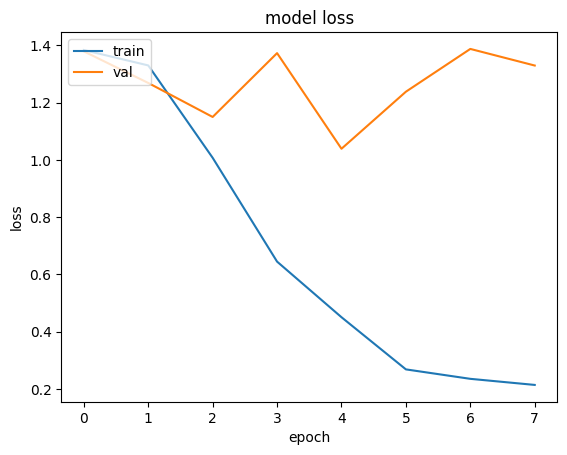

In [199]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [200]:
loss, accuracy = model.evaluate(val_ds)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5269 - loss: 1.1434
Test Loss: 1.0388
Test Accuracy: 0.5620


In [201]:
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.concatenate([y for x, y in val_ds], axis=0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 316ms/step


              precision    recall  f1-score   support

           0     0.1500    0.1071    0.1250        28
           1     0.5797    0.5882    0.5839        68
           2     0.1818    0.1905    0.1860        21
           3     0.0000    0.0000    0.0000         4

    accuracy                         0.3884       121
   macro avg     0.2279    0.2215    0.2237       121
weighted avg     0.3921    0.3884    0.3894       121



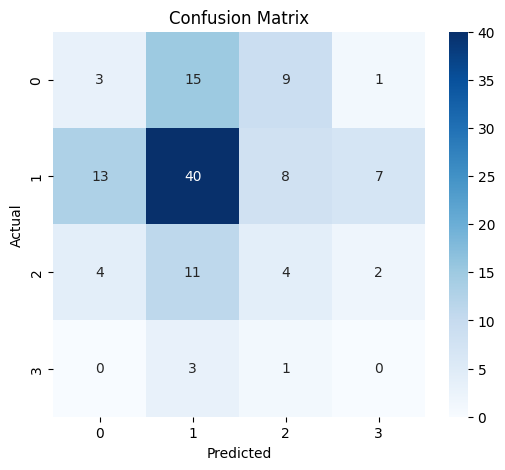

In [202]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, digits=4))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Pretrained Model

In [203]:
!pip install transformers datasets torch scikit-learn


In [216]:
!pip install --upgrade transformers

In [204]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL_NAME = "bert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=4)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [211]:
X_train_list = X_train.fillna("").astype(str).tolist()
X_test_list  = X_test.fillna("").astype(str).tolist()

y_train_list = y_train.tolist()
y_val_list   = y_test.tolist()

In [212]:
train_encodings = tokenizer(X_train_list, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(X_test_list, truncation=True, padding=True, max_length=128)


In [214]:
import torch

class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = TextDataset(train_encodings, y_train_list)
val_dataset = TextDataset(val_encodings, y_val_list)


In [220]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    logging_dir="./logs",
    report_to=[],
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)

trainer.train()


/tmp/ipython-input-1705655155.py:13: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


TrainOutput(global_step=93, training_loss=1.061473887453797, metrics={'train_runtime': 740.2395, 'train_samples_per_second': 1.957, 'train_steps_per_second': 0.126, 'total_flos': 33508719611640.0, 'train_loss': 1.061473887453797, 'epoch': 3.0})

In [221]:
trainer.evaluate()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 1.0279388427734375,
 'eval_runtime': 14.8783,
 'eval_samples_per_second': 8.133,
 'eval_steps_per_second': 0.538,
 'epoch': 3.0}

In [222]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions on validation set
pred_output = trainer.predict(val_dataset)
preds = np.argmax(pred_output.predictions, axis=1)  # predicted labels
labels = pred_output.label_ids

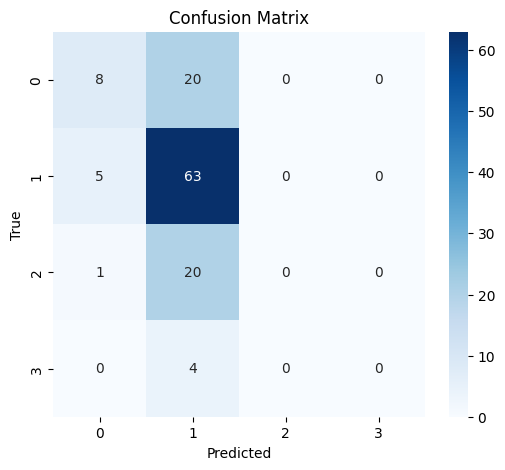

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(labels, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [224]:
report = classification_report(labels, preds, target_names=["Class 0", "Class 1", "Class 2", "Class 3"])
print(report)

              precision    recall  f1-score   support

     Class 0       0.57      0.29      0.38        28
     Class 1       0.59      0.93      0.72        68
     Class 2       0.00      0.00      0.00        21
     Class 3       0.00      0.00      0.00         4

    accuracy                           0.59       121
   macro avg       0.29      0.30      0.28       121
weighted avg       0.46      0.59      0.49       121



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
